<br><br>
<font size = "6">
<b>Dimension Reduction</b>
</font>


Table of Contents
<div id='toc'></div>

<a name="heading1"></a>
# 1. Statistics

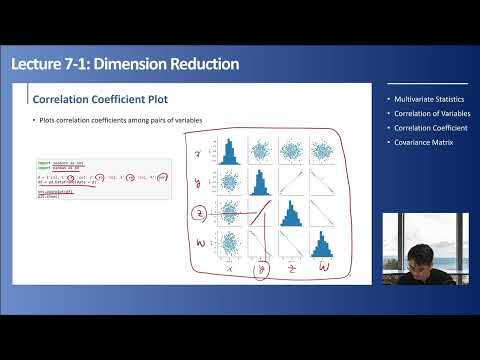

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('OWOzaQhdE3Y', width = "560", height = "315")



## 1.1. Populations and Samples

<center>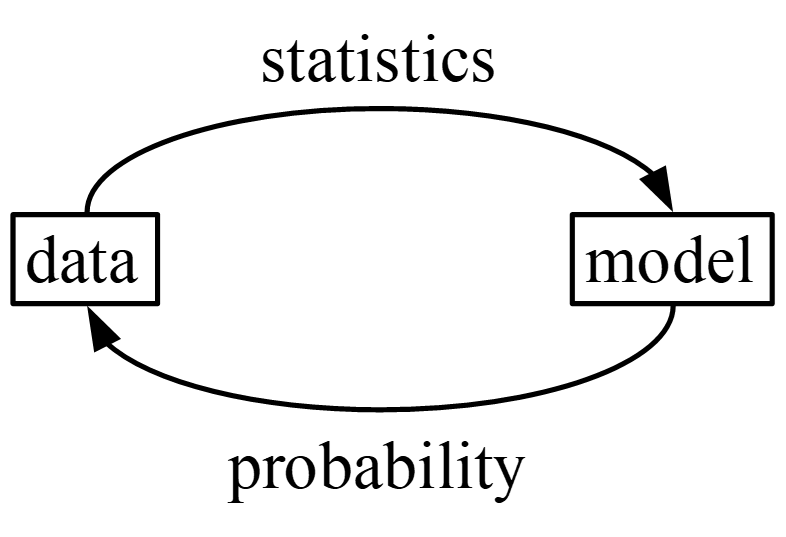</center>


- A **population** includes all the elements from a set of data


- A **parameter** is a quantity computed from a population
  - mean, $\mu$
  - variance, $\sigma^2$


- A **sample** is a subset of the population.
  - one or more observations


- A **statistic** is a quantity computed from a sample
  - sample mean, $\bar{x}$
  - sample variance, $𝑠^2$
  - sample correlation, $𝑆_{𝑥𝑦}$

<a name="heading2"></a>
### 1.1.1. How to Generate Random Numbers (Samples or data)
- Data sampled from population/process/generative model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
## random number generation (1D)
m = 1000;

# uniform distribution U(0,1)
x1 = np.random.rand(m,1);

# uniform distribution U(a,b)
a = 1;
b = 5;
x2 = a + (b-a)*np.random.rand(m,1);

# standard normal (Gaussian) distribution N(0,1^2)
# x3 = np.random.normal(0, 1, m)
x3 = np.random.randn(m,1);

# normal distribution N(5,2^2)
x4 = 5 + 2*np.random.randn(m,1);

# random integers
x5 = np.random.randint(1, 6, size = (1,m));

<a name="heading2-1"></a>
### 1.1.2. Histogram : graphical representation of data distribution

$ \Rightarrow$ rough sense of density of data



<br>
<center>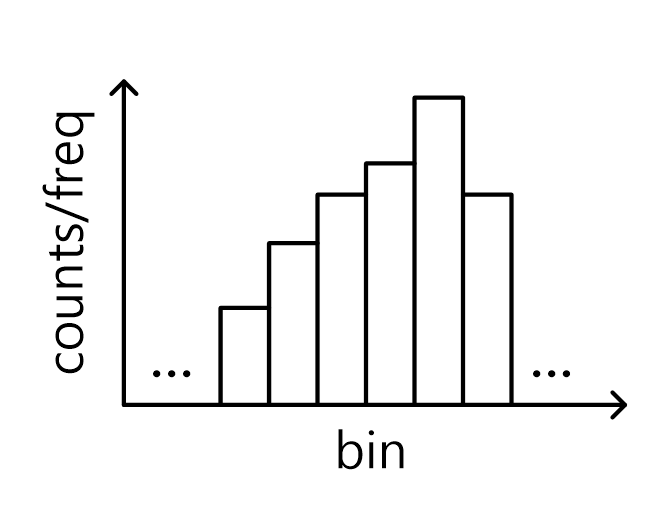</center>

<a name="heading3"></a>
## 1.2. Inference
- True population or process is modeled probabilistically.
- Sampling supplies us with realizations from probability model.
- Compute something, but recognize that we could have just as easily gotten a different set of realizations.



<br>
<center>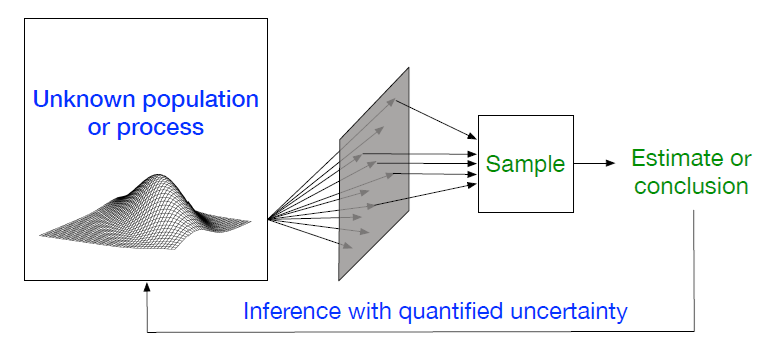</center>
<br>

<br>
<center>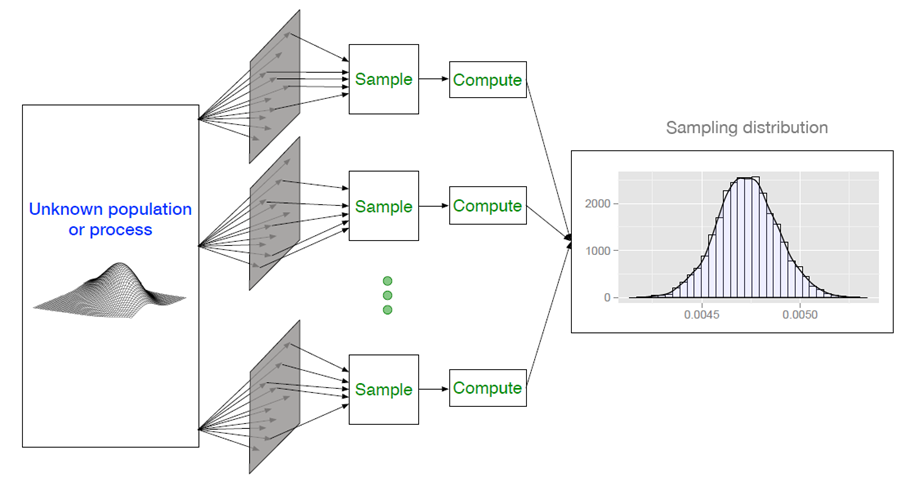</center>
<br>

- We want to infer the characteristics of the true probability model from our **one** sample.



<br>
<center>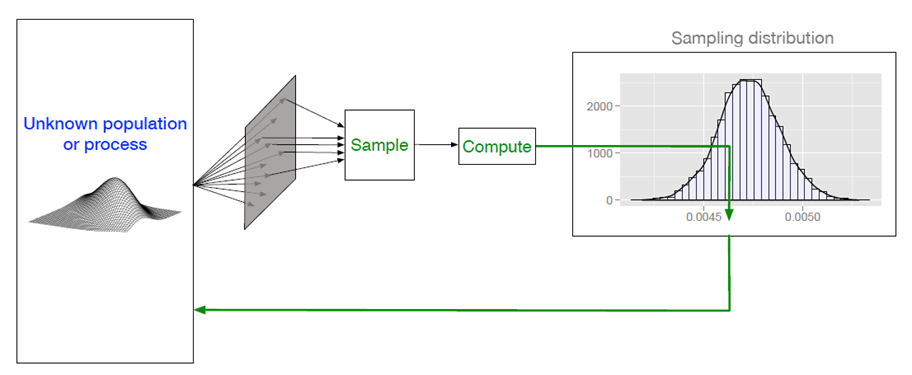</center>
<br>

<a name="heading4"></a>
## 1.3. Law of Large Numbers
- Sample mean converges to the population mean as sample size gets large

<br>

$$ \bar{x} \rightarrow \mu_x \qquad \text{as} \qquad m \rightarrow \infty$$

<br>

- True for any probability density functions



<br>
<center>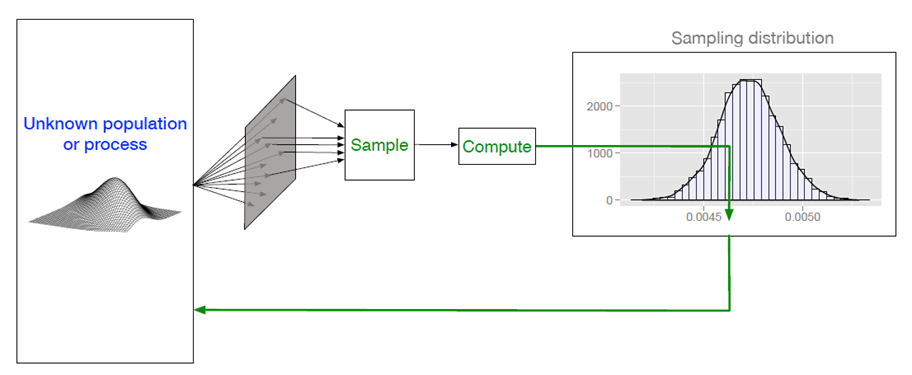</center>
<br>



- [wikipedia](http://en.wikipedia.org/wiki/Law_of_large_numbers)

- sample mean and sample variance

<br>

$$
\begin{align}
\bar{x} &=\frac{x_1+x_2+...+x_m}{m}\\
s^2 &=\frac{\sum_{i=1}^{m}(x_i-\bar{x})^2}{m-1}
\end{align}
$$

<br>

- suppose $x \sim U[0,1]$

In [ ]:
# statistics
# numerically understand statisticcs

m = 100
x = np.random.rand(m,1)

#xbar = 1/m*np.sum(x, axis = 0)
#np.mean(x, axis = 0)
xbar = 1/m*np.sum(x)
np.mean(x)

varbar = (1/(m - 1))*np.sum((x - xbar)**2)
np.var(x)

print(xbar)
print(np.mean(x))
print(varbar)
print(np.var(x))

0.4868602771581487
0.4868602771581487
0.0823877547236485
0.081563877176412


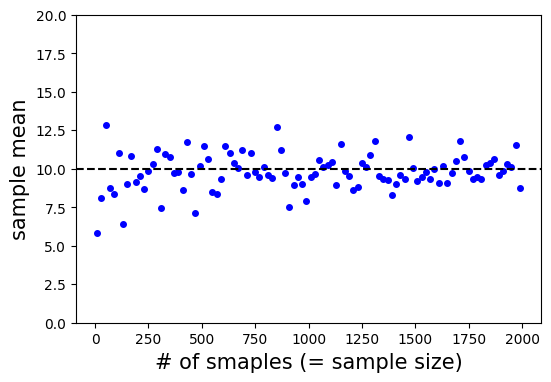

In [ ]:
# various sample size m

m = np.arange(10, 2000, 20)
means = []

for i in m:
    x = np.random.normal(10, 30, i)
    means.append(np.mean(x))

plt.figure(figsize = (6, 4))
plt.plot(m, means, 'bo', markersize = 4)
plt.axhline(10, c = 'k', linestyle='dashed')
plt.xlabel('# of smaples (= sample size)', fontsize = 15)
plt.ylabel('sample mean', fontsize = 15)
plt.ylim([0, 20])
plt.show()

<a name="heading5"></a>
## 1.4. Central Limit Theorem

- <font color='red'>Sample mean</font> (not samples) will be approximately normal-distributed as a sample size $m \rightarrow \infty$

<br>

$$ \bar{x} =\frac{x_1+x_2+...+x_m}{m}$$

<br>

- More samples provide more confidence (or less uncertainty)
- Note: true regardless of any distribution of population

<br>

$$ \bar{x} \rightarrow N\left(\mu_x,\left(\frac{\sigma}{\sqrt{m}}\right)^2 \right) $$



<br><br>
<center>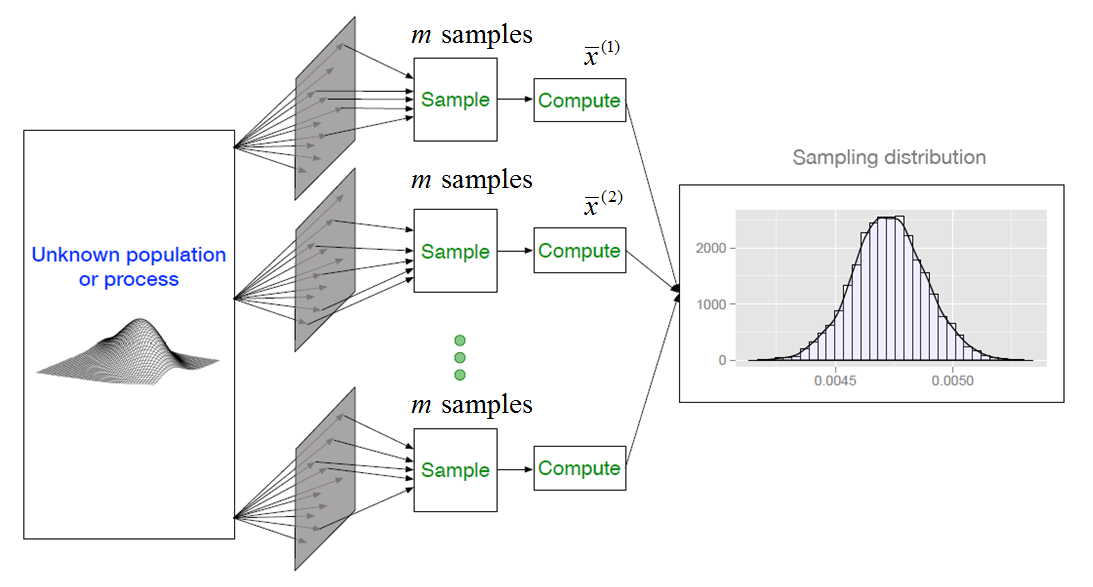</center>
<br>



- [wikipedia](http://en.wikipedia.org/wiki/Central_limit_theorem)

<a name="heading5-1"></a>
- __Variance Gets Smaller as $m$ is Larger__
  - Seems approximately Gaussian distributed
  - numerically demostrate that sample mean follows the Gaussin distribution

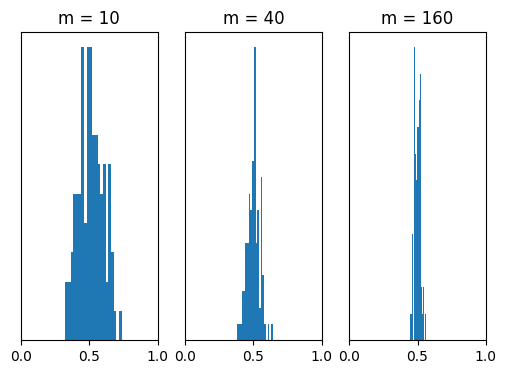

In [ ]:
N = 100
m = np.array([10, 40, 160])   # sample of size m

S1 = []   # sample mean (or sample average)
S2 = []
S3 = []

for i in range(N):
    S1.append(np.mean(np.random.rand(m[0], 1)))
    S2.append(np.mean(np.random.rand(m[1], 1)))
    S3.append(np.mean(np.random.rand(m[2], 1)))

plt.figure(figsize = (6, 4))
plt.subplot(1,3,1), plt.hist(S1, 21), plt.xlim([0, 1]), plt.title('m = '+ str(m[0])), plt.yticks([])
plt.subplot(1,3,2), plt.hist(S2, 21), plt.xlim([0, 1]), plt.title('m = '+ str(m[1])), plt.yticks([])
plt.subplot(1,3,3), plt.hist(S3, 21), plt.xlim([0, 1]), plt.title('m = '+ str(m[2])), plt.yticks([])
plt.show()

<a name="heading6"></a>
## 1.5. Multivariate Statistics

<br>

$$
x^{(i)} = \begin{bmatrix}x_1^{(i)} \\ x_2^{(i)}\\ \vdots \end{bmatrix}, \quad X = \begin{bmatrix} -& (x^{(i)})^T & -\\ - & (x^{(i)})^T & -\\ & \vdots & \\ - & (x^{(m)})^T & -\end{bmatrix}$$

<br>

- $m$ observations $\left(x^{(i)}, x^{(2)}, \cdots , x^{(m)}\right)$

<br>

$$
\begin{align*}
\text{sample mean} \; \bar x &= \frac{x^{(1)} + x^{(2)} + \cdots + x^{(m)}}{m} = \frac{1}{m} \sum\limits_{i=1}^{m}x^{(i)} \\
\text{sample variance} \; S^2 &= \frac{1}{m-1} \sum\limits_{i=1}^{m}(x^{(i)} - \bar x)^2 \\
(\text{Note: } &\text{population variance} \; \sigma^2 = \frac{1}{N}\sum\limits_{i=1}^{N}(x^{(i)} - \mu)^2
\end{align*}
$$

<a name="heading6-1"></a>
### 1.5.1. Correlation of Two Random Variables

<br>

$$
\begin{align*} \text{Sample Variance} : S_x &= \frac{1}{m-1} \sum\limits_{i=1}^{m}\left(x^{(i)}-\bar x\right)^2 \\
 \text{Sample Covariance} : S_{xy} &= \frac{1}{m-1} \sum\limits_{i=1}^{m}\left(x^{(i)}-\bar x\right)\left(y^{(i)}-\bar y \right)\\
\text{Sample Covariance matrix} : S &=
\begin{bmatrix}
S_x & S_{xy}  \\
S_{yx} & S_y
\end{bmatrix}\\
 \text{sample correlation coefficient} :
r &= \frac{S_{xy}}{ \sqrt {S_{xx}\cdot S_{yy}} }
\end{align*}$$

<br>

- Strength of <font color='red'><b>linear</b></font> relationship between two variables, $x$ and $y$

- Assume

<br>

$$x_1 \leq x_2 \leq \cdots \leq x_n$$

$$y_1 \leq y_2 \leq \cdots \leq y_n$$



<br><br>
<center>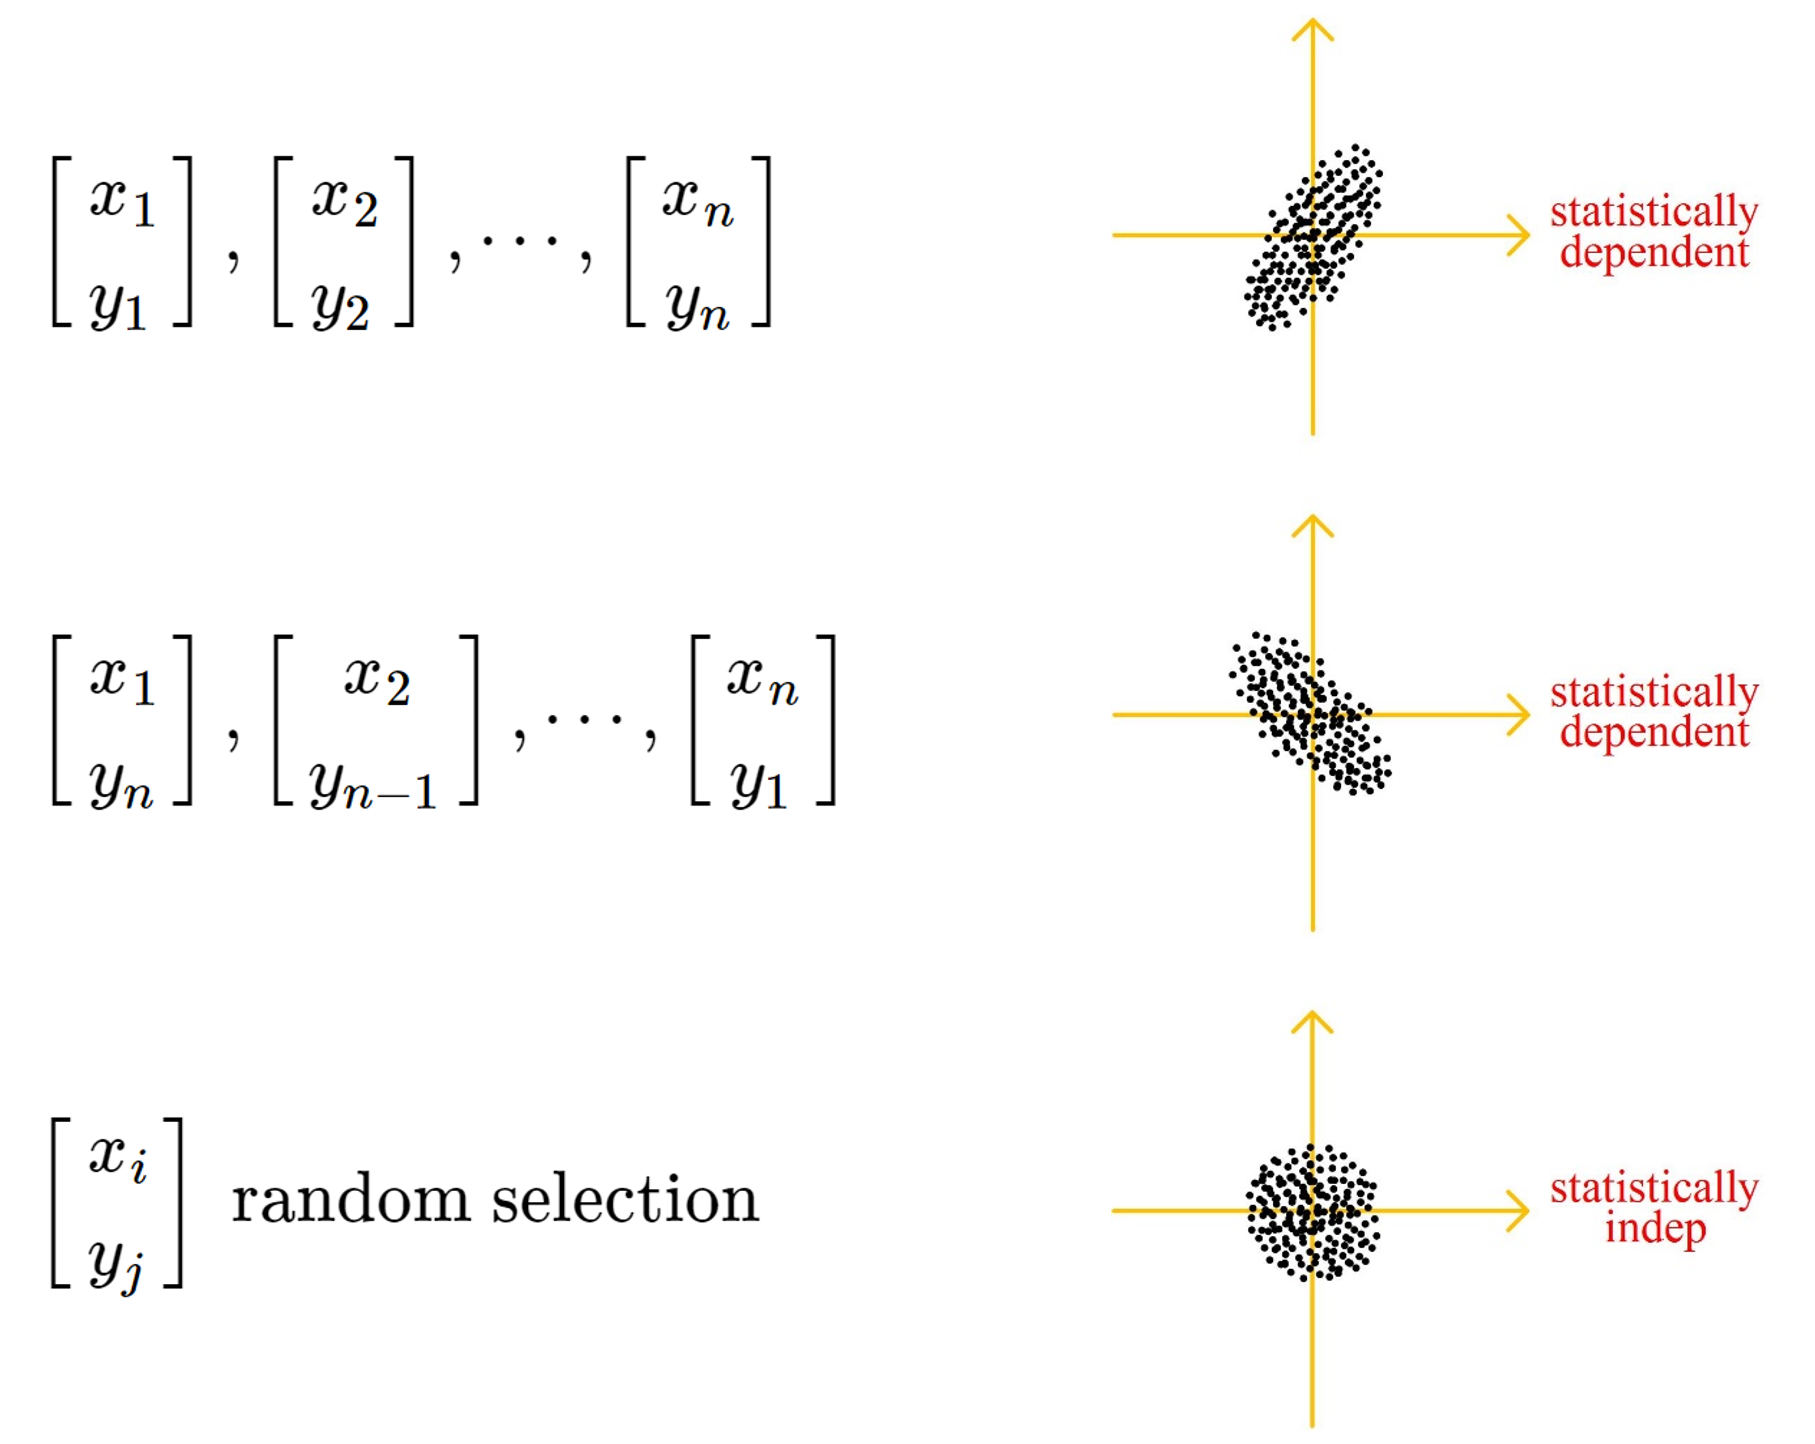</center>

<a name="heading6-2"></a>
### 1.5.2. Correlation Coefficient


- $+1 \to$ close to a straight line

- $-1 \to$ close to a straight line

- Indicate how close to a <font color='red'>linear</font> line, but

- No information on slope

<br>

$$0 \leq \left\lvert \text{ correlation coefficient } \right\rvert \leq 1$$

$$\hspace{1cm}\begin{array}{Icr}\leftarrow\\ (\text{uncorrelated})\end{array}
\quad \quad \quad
\begin{array}{Icr}\rightarrow \\ (\text{linearly correlated})\end{array}$$

<br>

- Does not tell anything about causality

<a name="heading6-3"></a>
### 1.5.3. Correlation Coefficient Plot

- Plots correlation coefficients among pairs of variables
- http://rpsychologist.com/d3/correlation/



<br><br>
<center>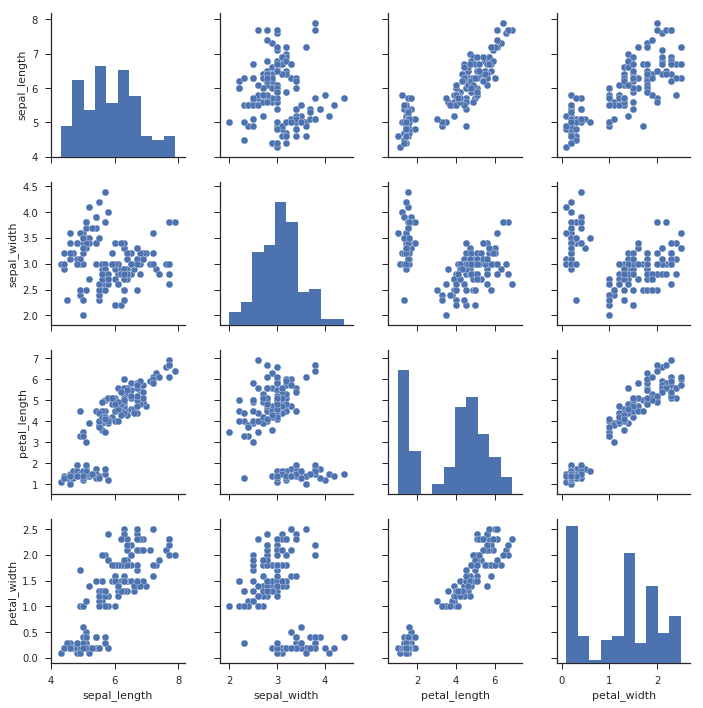</center>

<a name="heading6-4"></a>
### 1.5.4. Covariance Matrix

<br>

$$
\sum = \begin{bmatrix}
E[(X_1-\mu_1)(X_1-\mu_1)]& E[(X_1-\mu_1)(X_2-\mu_2)] & \cdots &E[(X_1-\mu_1)(X_n-\mu_n)]\\
E[(X_2-\mu_2)(X_1-\mu_1)]& E[(X_2-\mu_2)(X_2-\mu_2)] & \cdots &E[(X_2-\mu_2)(X_n-\mu_n)]\\
\vdots & \vdots & \ddots & \vdots\\
E[(X_n-\mu_n)(X_1-\mu_1)]& E[(X_n-\mu_n)(X_2-\mu_2)] & \cdots &E[(X_n-\mu_n)(X_n-\mu_n)]\\
\end{bmatrix}$$

<br>


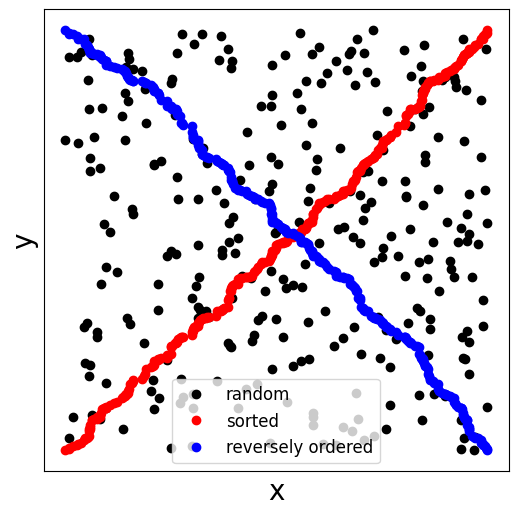

[[ 1.         -0.02820989]
 [-0.02820989  1.        ]] 

[[1.         0.99876111]
 [0.99876111 1.        ]] 

[[ 1.         -0.99758324]
 [-0.99758324  1.        ]]


In [ ]:
# correlation coefficient

m = 300
x = np.random.rand(m)
y = np.random.rand(m)

xo = np.sort(x)
yo = np.sort(y)
yor = -np.sort(-y)

plt.figure(figsize = (6, 6))
plt.plot(x, y, 'ko', label = 'random')
plt.plot(xo, yo, 'ro', label = 'sorted')
plt.plot(xo, yor, 'bo', label = 'reversely ordered')

plt.xticks([])
plt.yticks([])
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

print(np.corrcoef(x,y), '\n')
print(np.corrcoef(xo,yo), '\n')
print(np.corrcoef(xo,yor))

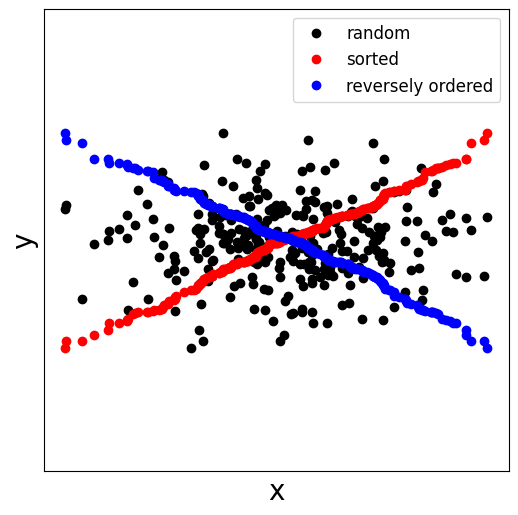

[[1.         0.00863611]
 [0.00863611 1.        ]] 

[[1.         0.99706562]
 [0.99706562 1.        ]] 

[[ 1.         -0.99683871]
 [-0.99683871  1.        ]]


In [ ]:
# correlation coefficient

m = 300
x = 2*np.random.randn(m)
y = np.random.randn(m)

xo = np.sort(x)
yo = np.sort(y)
yor = -np.sort(-y)

plt.figure(figsize = (6, 6))
plt.plot(x, y, 'ko', label = 'random')
plt.plot(xo, yo, 'ro', label = 'sorted')
plt.plot(xo, yor, 'bo', label = 'reversely ordered')

plt.xticks([])
plt.yticks([])
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

print(np.corrcoef(x,y), '\n')
print(np.corrcoef(xo,yo), '\n')
print(np.corrcoef(xo,yor))

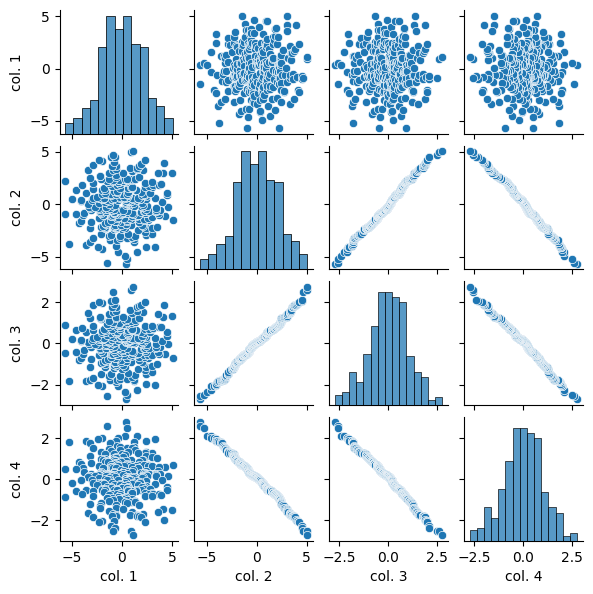

In [ ]:
import seaborn as sns
import pandas as pd

d = {'col. 1': x, 'col. 2': xo, 'col. 3': yo, 'col. 4': yor}
df = pd.DataFrame(data = d)

sns.pairplot(df, height = 1.5, aspect = 1)
plt.show()

<a name="heading1"></a>
# 2. Principal Component Analysis (PCA)

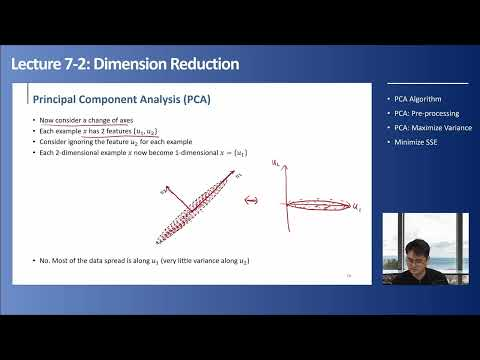

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('-sM2dYlYSoI', width = "560", height = "315")



<br>

<font size='4'><b>Motivation: Can we describe high-dimensional data in a "simpler" way?</b></font> <br>

$\quad \rightarrow$ Dimension reduction without losing too much information <br>
$\quad \rightarrow$ Find a low-dimensional, yet useful representation of the data

- Why dimensionality reduction?
    - insights into the low-dimensinal structures in the data (visualization)
    - Fewer dimensions ⇒ Less chances of overfitting ⇒ Better generalization
    - <font color='blue'>Speeding up</font> learning algorithms
        - Most algorithms scale badly with increasing data dimensionality
    - <font color='blue'>Less storage</font> requirements (data compression)
    - Note: Dimensionality Reduction is <font color='red'>different from Feature Selection</font>
        - .. although the goals are kind of the same
    - Dimensionality reduction is more like “<font color='red'>Feature Extraction</font>”
        - Constructing a small set of new features from the original features

- How? <br>
idea: highly correlated data contains redundant features



<br>
<center>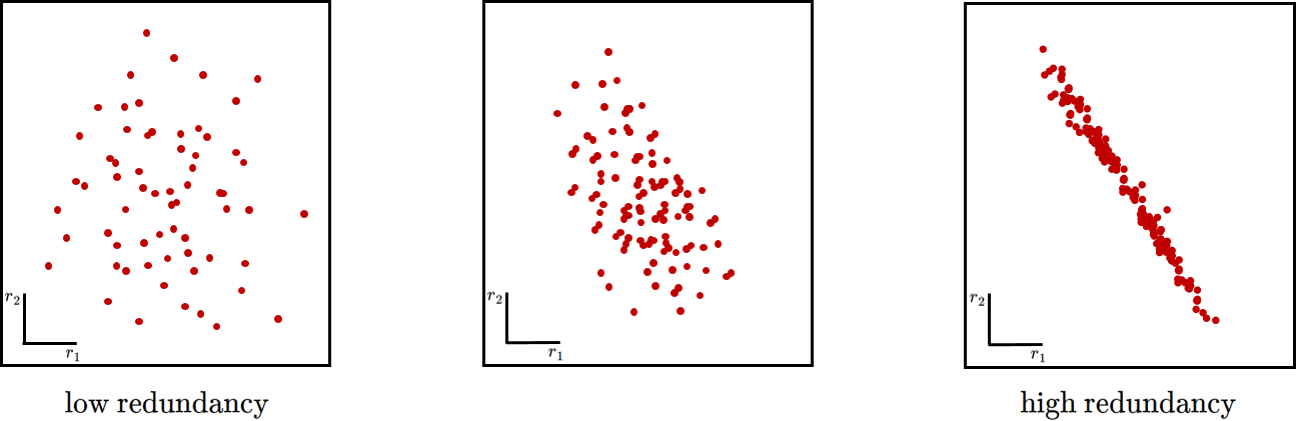</center>
<br><br>

- Each example $x$ has 2 features $\{x_1,x_2\}$

- Consider ignoring the feature $x_2$ for each example

- Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{x_1\}$

- Are we losing much information by throwing away $x_2$ ?



<br><br>
<center>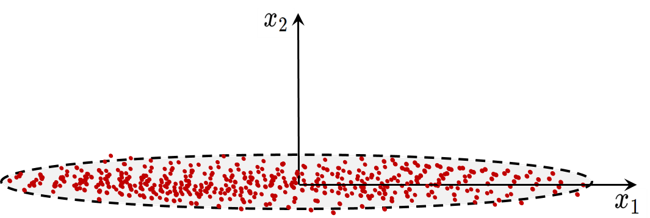</center>

- Each example $x$ has 2 features $\{x_1,x_2\}$

- Consider ignoring the feature $x_2$ for each example

- Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{x_1\}$

- Are we losing much information by throwing away $x_2$ ?

- <font color='blue'>Yes</font>, the data has substantial variance along both features (_i.e._ both axes)



<br><br>
<center></center>


- Now consider a change of axes

- Each example $x$ has 2 features $\{u_1,u_2\}$

- Consider ignoring the feature $u_2$ for each example

- Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{u_1\}$

- Are we losing much information by throwing away $u_2$ ?

- <font color='red'>No</font>. Most of the data spread is along $u_1$ (very little variance along $u_2$)            



<br><br>
<center>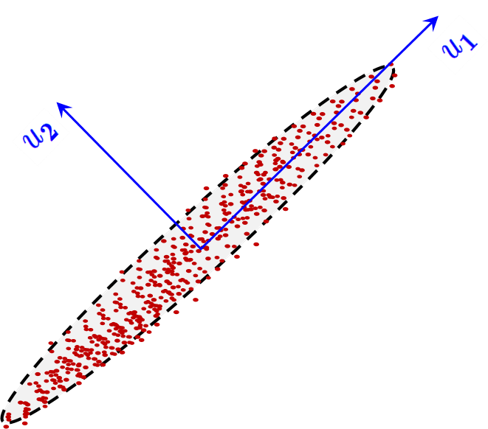</center>

- Data $\rightarrow$ projection onto unit vector $\hat{u}_1$
    - PCA is used when we want projections capturing maximum variance directions
    - Principal Components (PC): directions of maximum variability in the data
    - Roughly speaking, PCA does a change of axes that can represent the data in a succinct manner



<br><br>
<center>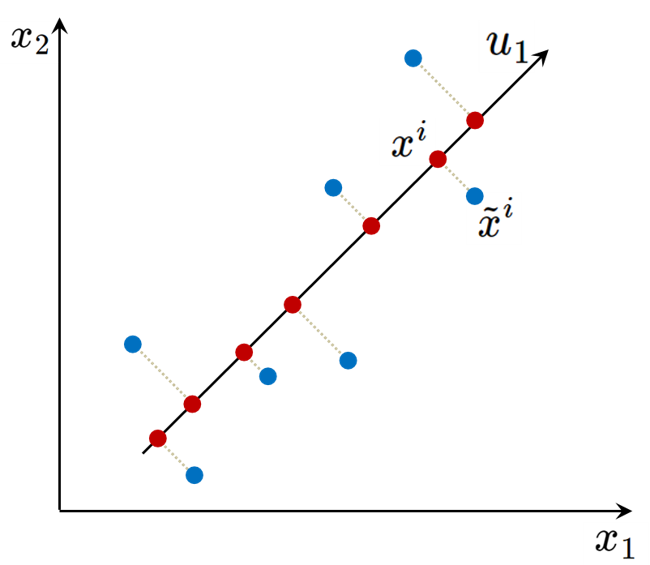</center>

<center>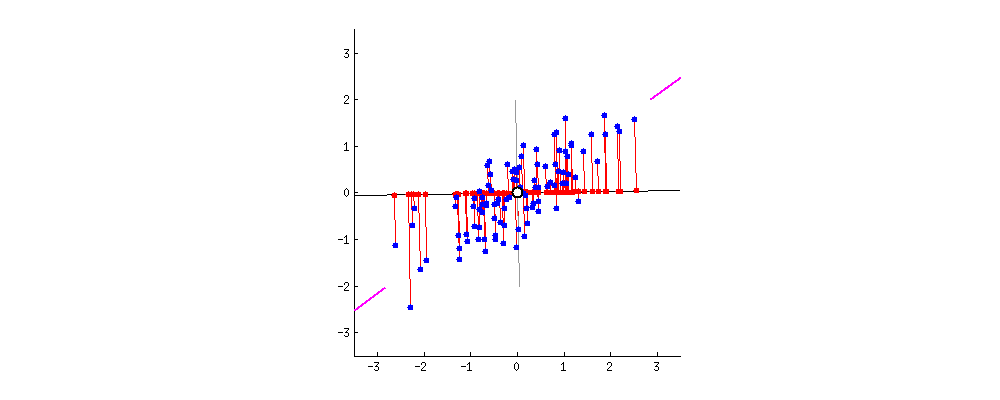</center>




- HOW?
 1. <font color='blue'>Maximize variance</font> (most separable)
 2. <font color='blue'>Minimize the sum-of-squares</font> (minimum squared error)

<a name="heading2"></a>
## 2.1. PCA Algorithm

<a name="heading2-1"></a>
### 2.1.1. Pre-processing

- Given data

<br>

$$ x^{(i)} = \begin{bmatrix} x^{(i)}_1 \\ \vdots \\x^{(i)}_n \end{bmatrix},\qquad X = \begin{bmatrix} \cdots & (x^{(1)})^T & \cdots\\
\cdots & (x^{(2)})^T & \cdots\\
& \vdots & \\
\cdots & (x^{(m)})^T & \cdots\\
\end{bmatrix}$$

<br>

- Shifting (zero mean) and rescaling (unit variance)
    1. Shift to zero mean<br><br>
$$
\begin{align*}
\mu &= \frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)} \\
x^{(i)} &\leftarrow x^{(i)} - \mu \quad \text{(zero mean)}
\end{align*}
$$
<br>
    2. [optional] Rescaling (unit variance)<br><br>
$$\begin{align*}
\sigma^2_j &= \frac{1}{m-1}\sum\limits_{i=1}{m}\left(x_j^{(i)}\right)^2 \\
x^{(i)}_j &\leftarrow \frac{x^{(i)}_j}{\sigma_j} \\
\end{align*}$$


<a name="heading2-2"></a>
### 2.1.2. Maximize Variance

- Find unit vector $u$ such that <font color='red'>maximizes variance of projections</font>

  Note: $m \approx m-1$ for big data

<br>

$$\begin{align*} \text{variance of projected data}
& = \frac{1}{m}\sum\limits_{i=1}^{m}\big(u^Tx^{(i)}\big)^2  = \frac{1}{m}\sum\limits_{i=1}^{m}\big( {x^{(i)}}^Tu\big)^2 \\
& = \frac{1}{m}\sum\limits_{i=1}^{m}\big( {x^{(i)}}^Tu\big)^T\big( {x^{(i)}}^Tu\big) = \frac{1}{m}\sum\limits_{i=1}^{m}u^Tx^{(i)}{x^{(i)}}^Tu \\
& = u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T \right) u \\
& =u^TSu \qquad (S=\frac{1}{m}X^T X: \text{sample covariance matrix})
\end{align*}$$

- In an optimization form

<br>

$$\begin{align*} \text{maximize} \quad & u^TSu \\
\text{subject to} \quad
& u^Tu = 1\end{align*}$$

<br>

$$\begin{align*} & u^TSu = u^T\lambda u = \lambda u^Tu = \lambda \quad (\text{Eigen analysis} : Su = \lambda u) \\ \\
& \implies \text{pick the largest eigenvalue } \lambda _1 \text{ of covariance matrix } S\\
& \implies u = u_1 \, \text{ is the } \,\lambda_1's \,\text{ corresponding eigenvector}\\
& \implies u_1 \text{ is the first principal component (direction of highest variance in the data)}
\end{align*}$$

<a name="heading2-3"></a>
### 2.1.3. Minimize the Sum-of-Squared Error



<br>
<center>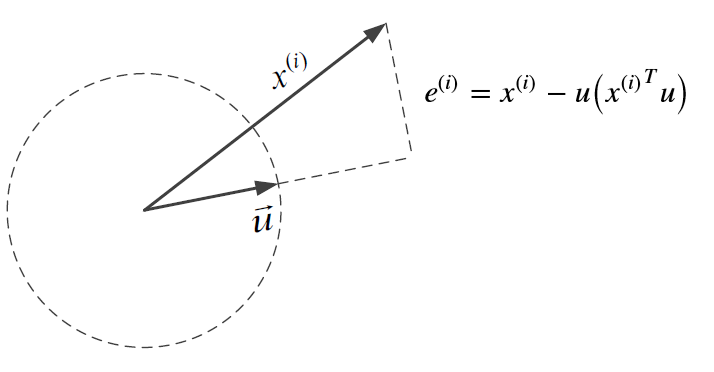</center>
<br><br>



$$
\begin{align*} \lVert e^{(i)} \rVert ^2 & = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^2 \\
& = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^T\big( {x^{(i)}}^Tu \big) \\
& = \lVert x^{(i)} \rVert ^2 - u^Tx^{(i)}{x^{(i)}}^Tu\\
\end{align*}
$$
  
<br>

$$\begin{align*} \frac {1}{m} \sum\limits_{i=1}^{m} \lVert e^{(i)} \rVert ^2
& = \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2 -
\frac{1}{m}\sum\limits_{i=1}^{m}u^Tx^{(i)}{x^{(i)}}^Tu \\
& = \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2  -
u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u \end{align*}$$

- In an optimization form

<br>

$$\begin{align*} &\text{minimize} \; \underbrace{\frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2}_{\text{constant given $x_i$}}  -
 \underbrace{u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u}_{\text{maximize}} \\ \\
\implies &\text{maximize} \;
 u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u = \max \; u^T S u\end{align*}$$

<br>

$$ \therefore \; \text{minimize} \; error^2 = \text{maximize} \; variance$$

<a name="heading2-4"></a>
### 2.1.4. Dimension Reduction Method ($n \rightarrow k$)

1. Choose top $k$ (orthonormal) eigenvectors, $U = [u_1, u_2, \cdots, u_k]$
    
2. Project $x_i$ onto span $\{ u_1, u_2, \cdots, u_k\}$
    
<br>

$$z^{(i)} = \begin{bmatrix}
u_1^Tx^{(i)}\\
u_2^Tx^{(i)}\\
\vdots \\
u_k^Tx^{(i)}\\
\end{bmatrix} \;\text{ or }\; z = U^{T}x
$$

<br>

- Pictorial summary of PCA



<br>
<center></center>
<br>




$\qquad \qquad \qquad \qquad x^{(i)} \rightarrow$ projection onto unit vector $u \implies u^Tx^{(i)} = $ distance from the origin along $u$

<a name="heading3"></a>
## 2.2. PCA Visualization
<a name="heading3-1"></a>
### 2.2.1. Eigenvalues

- $\lambda_1, \lambda_2$ indicates variance along the eigenvectors, respectively.

- The larger eigenvalue is, the more dominant feature (eigenvector) is  





<center>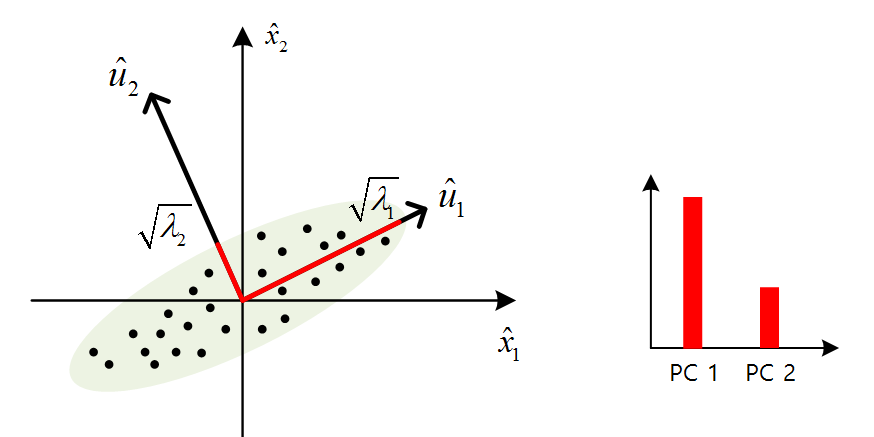</center>

<a name="heading3-2"></a>
### 2.2.2. Eigenvectors

- Given basis $\{\hat{x}_1, \hat{x}_2\}$ to transformed basis $\{\hat{u}_1, \hat{u}_2\}$



<br>
<center></center>
<br>



$$[\hat{u}_1\; \hat{u}_2]=[\hat{x}_1 \; \hat{x}_2]\begin{bmatrix} c_1 & c_3 \\c_2 & c_4\end{bmatrix}$$

<a name="heading4"></a>
## 2.3. Python Codes

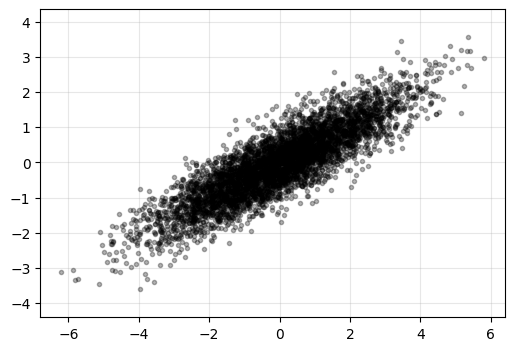

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data generation
m = 5000
mu = np.array([0, 0])
sigma = np.array([[3, 1.5],
                  [1.5, 1]])

X = np.random.multivariate_normal(mu, sigma, m)
X = np.asmatrix(X)

fig = plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'k.', alpha = 0.3)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
S = 1/(m-1)*X.T*X

D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:,idx]

print(D, '\n')
print(U)

[3.88031855 0.1996516 ] 

[[ 0.88126846 -0.47261602]
 [ 0.47261602  0.88126846]]


In [ ]:
h = U[1,0]/U[0,0]
xp = np.arange(-6, 6, 0.1)
yp = h*xp

fig = plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'k.', alpha = 0.3)
plt.plot(xp, yp, 'r', linewidth = 3)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

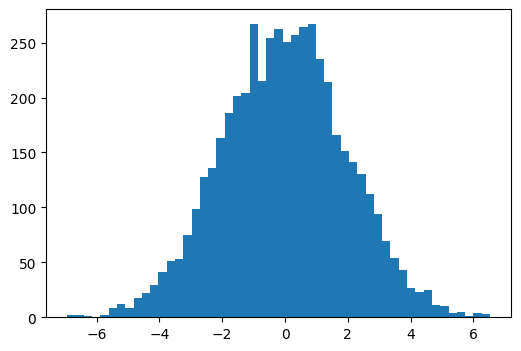

In [ ]:
Z = X*U[:,0]

plt.figure(figsize = (6, 4))
plt.hist(Z, 51)
plt.show()

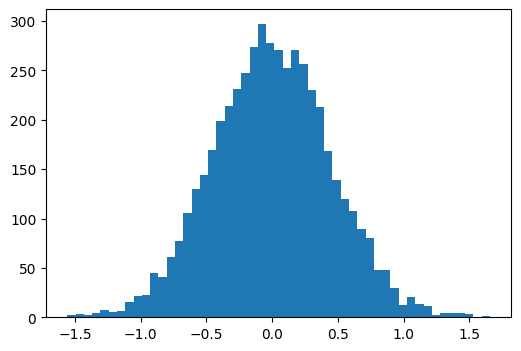

In [ ]:
Z = X*U[:,1]

plt.figure(figsize = (6, 4))
plt.hist(Z, 51)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

X = np.array(X)

pca = PCA(n_components = 1)
pca.fit(X)

PCA(n_components=1)

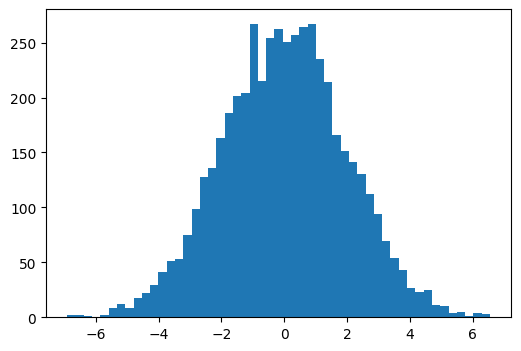

In [ ]:
u = pca.transform(X)

plt.figure(figsize = (6, 4))
plt.hist(u, 51)
plt.show()

In [ ]:
X = X - np.mean(X, axis = 0)

S = 1/(m-1)*X.T*X

D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:,idx]

print(D, '\n')
print(U)

ValueError: operands could not be broadcast together with shapes (2,5000) (5000,2) 

In [ ]:
plt.figure(figsize = (6, 4))
plt.stem(np.sqrt(D))
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
# relative magnitutes of the principal components

Z = X*U
xp = np.arange(0, m)/24    # 24 frame rate

plt.figure(figsize = (6, 4))
plt.plot(xp, Z)
plt.yticks([])
plt.show()

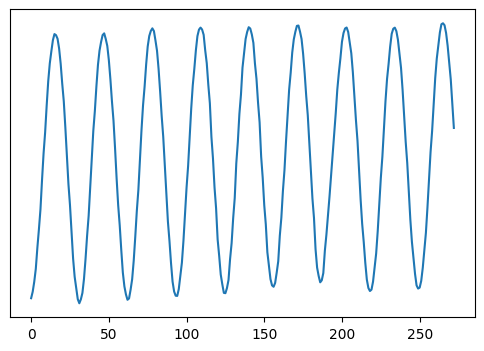

In [ ]:
## projected onto the first principal component
# 6 dim -> 1 dim (dim reduction)
# relative magnitute of the first principal component

Z = X*U[:,0]

plt.figure(figsize = (6, 4))
plt.plot(Z)
plt.yticks([])
plt.show()

Reference: John P Cunningham & Byron M Yu, Dimensionality reduction for large-scale neural recordings, Nature Neuroscience 17, 1500–1509 (2014)



<br><br>
<center>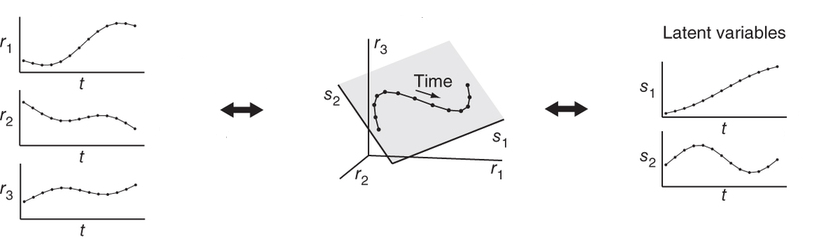</center>

<a name = "heading1"></a>
# 3. Fisher Discriminant Analysis (FDA) or Linear Discriminant Analysis (LDA)

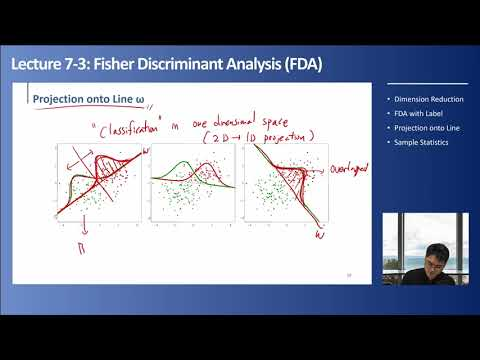

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('4Pz3TDX5dBs', width = "560", height = "315")



## 3.1. FDA Algorithm

### 3.1.1. Dimensionality Reduction with Label

- Dimensionality reduction with label information (when the ultimate goal is classification/regression)


- PCA ignores label information even if it is available
    - Only chooses directions of maximum variance


- Fisher Discriminant Analysis (FDA) takes into account the label information
    - It is also called Linear Discriminant Analysis (LDA)


- FDA/LDA projects data while preserving class separation
    - <font color='red'>Examples from same class are put closely together by the projection</font>
    - <font color='red'>Examples from different classes are placed far apart by the projection</font>

<a name = "heading2"></a>
### 3.1.2. Projection onto Line $\omega$

- Linear regression projects each data point
  - assume zero mean, otherwise $x \leftarrow x - \bar{x}$
  - $\omega_0 = 0$

<br>

$$ \hat{y} = \langle \omega,x\rangle = \omega^Tx = \omega_1x_1 + \omega_2x_2$$

<br>

- Dimension reduction

<br>

$$x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} \rightarrow \hat y \; (\text{scalar})$$

<br>

- Each data point $x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$ is projected onto $\omega$ (projected length on $\omega$ direction)

<br>

- For a given $\omega$, distribution of the projected points $\{ \hat y^{(1)}, \cdots, \hat y^{(m)} \}$ is specified.
<br><br><br>
 __Question: Which $\omega$ is better for classification?__

<br>
<center></center>
<br>



<center></center>

<a name = "heading3"></a>
### 3.1.3. Fisher Discriminant Analysis


- Find $\omega$ so that when projected onto $\omega$,
  - the classes are maximally separated (maximize distance between classes)
  - Each class is tight (minimize variance of each class)
    
<br><br>    

$$\max_\omega \frac{(\text{seperation of projected means})^2}{\text{sum of within class variances}}$$

<br>

$$ \implies \max_\omega \frac {\big(\mu_0^T\omega - \mu_1^T\omega \big)^2}{n_0\omega^TS_0\omega + n_1\omega^TS_1\omega}$$




<br><br>
<center>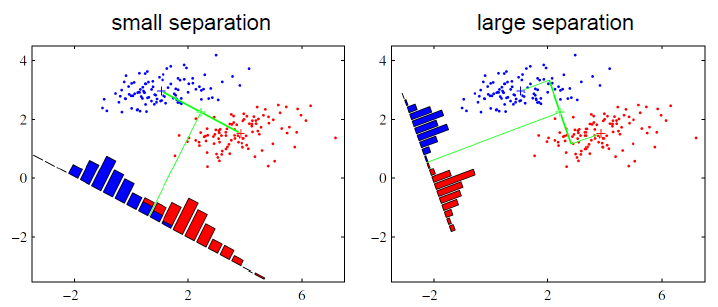</center>
<br>

$$\omega = \text{arg}\max_\omega \bigg\{ \frac{\big((\mu_0^T - \mu_1^T)\omega\big)^2}{n_0\omega^TS_0\omega + n_1\omega^TS_1\omega} \bigg \}$$

<br>

$$J(\omega) = \frac {\big((\mu_0^T - \mu_1^T)\omega\big)^2}{\omega^T(n_0S_0 + n_1S_1)\omega} = \frac {(m^T\omega)^2}{\omega^T\Sigma \omega}$$

<br><br>

$$
\begin{align*}
m &\equiv \mu_0 - \mu_1  &\\
\Sigma &\equiv n_0S_0 + n_1S_1 = R^TR \qquad &\text{We can always write } \Sigma \text{ like this, where } R \text{ is a square root matrix} \\
u &\equiv R\omega \rightarrow \omega = R^{-1}u \qquad &\text{Using } R, \text{change the coordinate systems from } \omega \text{ to } u
\end{align*}
$$

<br><br>

$$J(u) = \frac {\big( m^TR^{-1}u\big)^2}{\omega^TR^TR\omega} = \frac {\bigg( \big(R^{-T}m \big)^Tu\bigg)^2}{u^Tu}=
\bigg( \left(R^{-T}m \right)^T  \frac{u}{\parallel u \parallel} \bigg)^2$$

<br>

$$J(u) = \bigg( \left(R^{(-T)}m \right)^T  \frac{u}{\lVert u \rVert} \bigg)^2 \; \text{is maximum when} \; u = a\,R^{-T}m$$

<br>

- Why?
    - Dot product of a unit vector and another vector is maximum when the two have the same direction.

<br>

$$\begin{align*}
u &= aR^{-T}m = aR^{-T}(\mu_0 - \mu_1)\\
 \omega &= R^{-1}u = aR^{-1}R^{-T}(\mu_0 - \mu_1) = a\big(R^TR\big)^{-1}(\mu_0 - \mu_1) = a\Sigma^{-1}(\mu_0 - \mu_1) \\ \\
\therefore \; \omega &= a(n_0S_0 + n_1S_1)^{-1}(\mu_0 - \mu_1)
\end{align*}$$

<a name = "heading4"></a>
## 3.2. Python Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# generating data set

n0 = 200
n1 = 200

mu = [0, 0]
sigma = [[0.9, -0.4],
         [-0.4, 0.3]]

x0 = np.random.multivariate_normal([2.5,2.5], sigma, n0).T        # data in class 0
x1 = np.random.multivariate_normal([1,1], sigma, n1).T            # data in class 0

x0 = np.asmatrix(x0)
x1 = np.asmatrix(x1)

In [ ]:
mu0 = np.mean(x0, axis = 1)
mu1 = np.mean(x1, axis = 1)

S0 = 1/(n0 - 1)*(x0 - mu0)*(x0 - mu0).T
S1 = 1/(n1 - 1)*(x1 - mu1)*(x1 - mu1).T

w = (n0*S0 + n1*S1).I*(mu0 - mu1)
print(w)

[[0.02702847]
 [0.04885679]]


<font size='4'><b>Projection line and histogram</b></font>

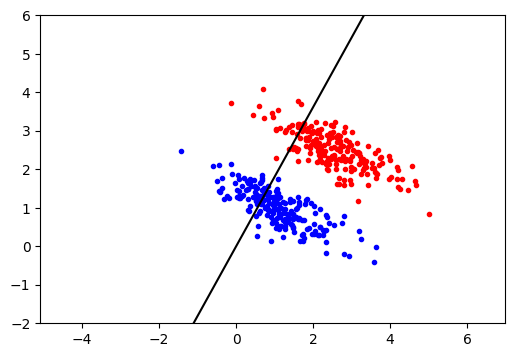

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(x0[0,:], x0[1,:], 'r.')
plt.plot(x1[0,:], x1[1,:], 'b.')

xp = np.arange(-4, 6, 0.1)
yp = w[1,0]/w[0,0]*xp
plt.plot(xp, yp, 'k')
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

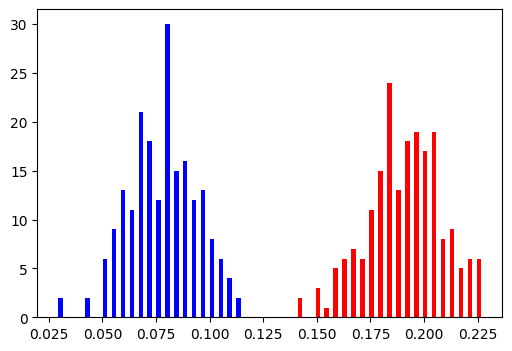

In [ ]:
y1 = x0.T*w
y2 = x1.T*w

plt.figure(figsize = (6, 4))
plt.hist(y1, 21, color = 'r', rwidth = 0.5)
plt.hist(y2, 21, color = 'b', rwidth = 0.5)
plt.show()

<font size='4'><b>Different $\omega$ (x axis)</b></font>

In [ ]:
w = np.array([[1], [0]])
w = np.asmatrix(w)

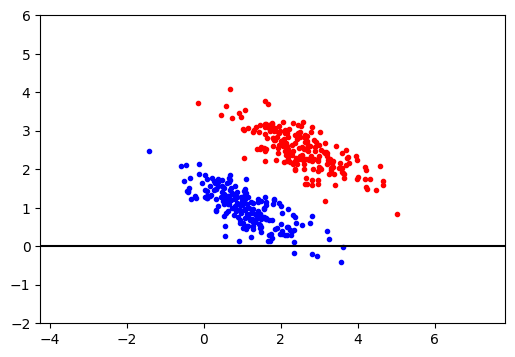

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(x0[0,:], x0[1,:], 'r.')
plt.plot(x1[0,:], x1[1,:], 'b.')
plt.axhline(0, color = 'k')
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

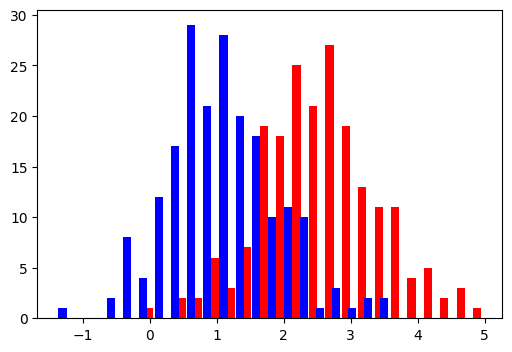

In [ ]:
y1 = x0.T*w
y2 = x1.T*w

plt.figure(figsize = (6, 4))
plt.hist(y1, 21, color = 'r', rwidth = 0.5)
plt.hist(y2, 21, color = 'b', rwidth = 0.5)
plt.show()

<font size='4'><b>Different $\omega$ (y axis)</b></font>

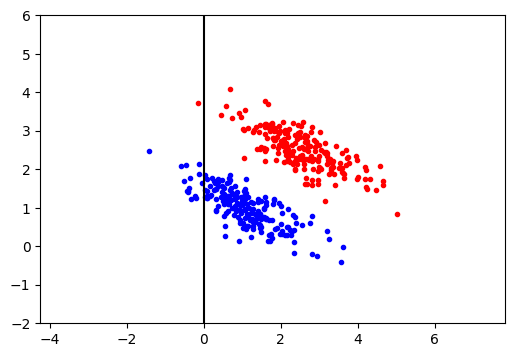

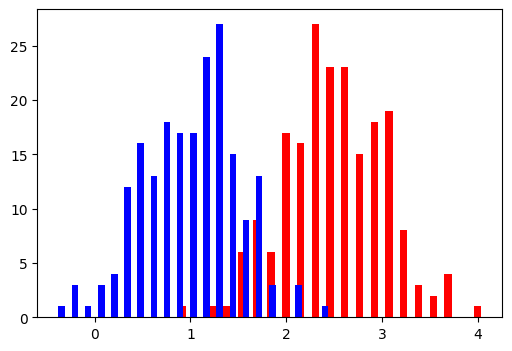

In [ ]:
w = np.array([[0], [1]])
w = np.asmatrix(w)

plt.figure(figsize = (6, 4))
plt.plot(x0[0,:], x0[1,:], 'r.')
plt.plot(x1[0,:], x1[1,:], 'b.')
plt.axvline(0, color = 'k')
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

y1 = x0.T*w
y2 = x1.T*w

plt.figure(figsize = (6, 4))
plt.hist(y1, 21, color = 'r', rwidth = 0.5)
plt.hist(y2, 21, color = 'b', rwidth = 0.5)
plt.show()

<a name = "heading5"></a>
__Scikit-learn__

In [ ]:
# reshape data

X = np.vstack([x0.T, x1.T])
y = np.vstack([np.ones([n0, 1]), np.zeros([n1, 1])])

In [ ]:
from sklearn import discriminant_analysis

X = np.array(X)

clf = discriminant_analysis.LinearDiscriminantAnalysis()
clf.fit(X, np.ravel(y))

LinearDiscriminantAnalysis()

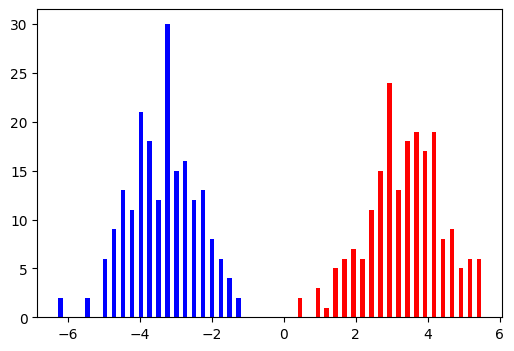

In [ ]:
# projection

X_LDA = clf.transform(X)

plt.figure(figsize = (6, 4))
plt.hist(X_LDA[0:200], 21, color = 'r', rwidth = 0.5)
plt.hist(X_LDA[200:400], 21, color = 'b', rwidth = 0.5)
plt.show()

In [ ]:
# classifier boundary, not a projection line

clf_w = clf.coef_[0]
clf_w0 = clf.intercept_[0]
print(clf_w)
print(clf_w0)

[10.81138803 19.54271748]
-53.80755330301122


In [ ]:
# projection line

mu0 = np.mean(x0, axis = 1)
mu1 = np.mean(x1, axis = 1)

S0 = 1/(n0 - 1)*(x0 - mu0)*(x0 - mu0).T
S1 = 1/(n1 - 1)*(x1 - mu1)*(x1 - mu1).T

prj_w = (n0*S0 + n1*S1).I*(mu0 - mu1)

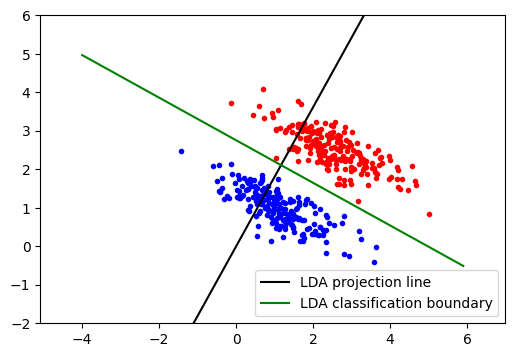

In [ ]:
xp = np.arange(-4, 6, 0.1)
prj_yp = prj_w[1,0]/prj_w[0,0]*xp
clf_yp = - clf_w[0]/clf_w[1]*xp - clf_w0/clf_w[1]

plt.figure(figsize = (6, 4))
plt.plot(x0[0,:], x0[1,:], 'r.')
plt.plot(x1[0,:], x1[1,:], 'b.')
plt.plot(xp, prj_yp, 'k', label = 'LDA projection line')
plt.plot(xp, clf_yp, 'g', label = 'LDA classification boundary')
plt.legend()
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

<a name = "heading1"></a>
# 4. Singular Value Decomposition (SVD)

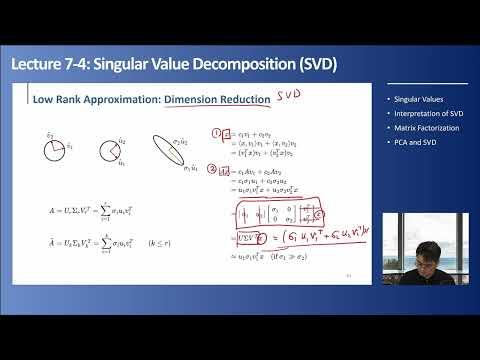

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('sFym4MYOQ-o', width = "560", height = "315")



__Geometry of Linear Maps__

Matrix $A$ (or linear transformation) = rotate + stretch/compress



<br>
<center>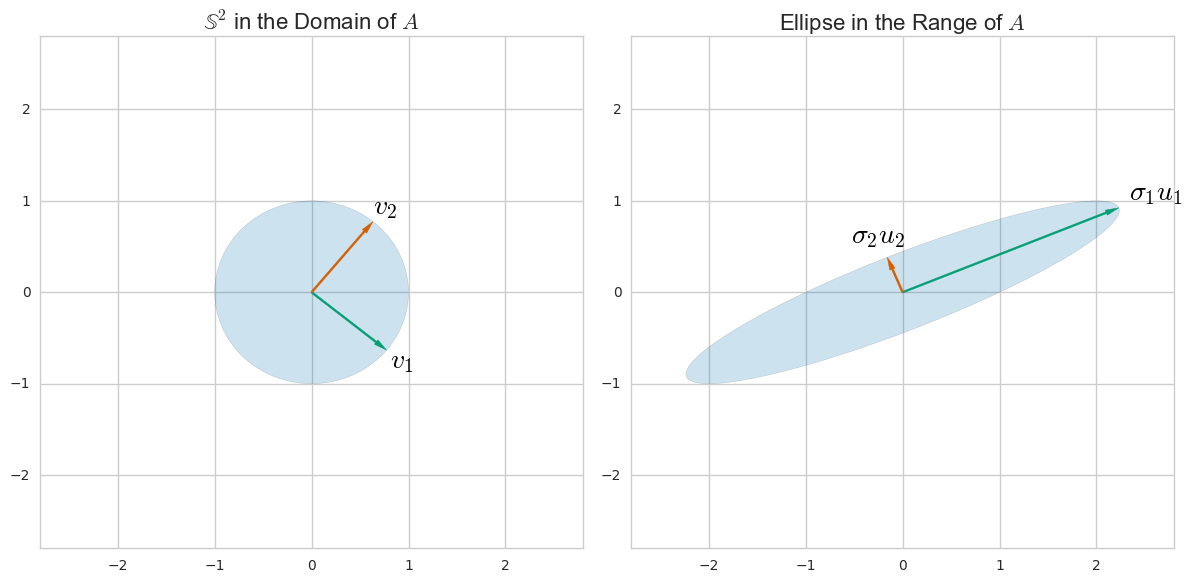</center>
<br>



an <font color=blue><i>extremely</i></font> important fact:

<br>
<center>every matrix $A \in \mathbb{R}^{m \times n}$ maps the unit ball in $\mathbb{R}^n$ to an ellipsoid in $\mathbb{R}^m$</center>

<br>

$$
\begin{align*}
S &= \{ x \in \mathbb{R}^n \mid \; \Vert x \Vert \leq 1 \}\\
AS &= \{Ax \mid x\in \mathbf{S}\}
\end{align*}
$$

<a name = "heading2"></a>
## 4.1. SVD Algorithm

__Singular Values and Singular Vectors__

- the numbers $\sigma_1, \cdots, \sigma_n$ are called the _singular values_ of $A$ by convention, $\sigma_i > 0$

- the vectors $u_1, \cdots, u_n$  are unit vectors along the principal semiaxes of $AS$

- the vectors $v_1, \cdots, v_n$  are the preimages of the principal semiaxes, defined so that

<br>

$$ A v_i = \sigma_i u_i$$


$$\begin{align*}
A\begin{bmatrix} v_1& v_2 & \cdots & v_r \end{bmatrix}
& =\begin{bmatrix} A v_1 & A v_2 & \cdots & A v_r \end{bmatrix} \\
& =\begin{bmatrix} \sigma_1u_1& \sigma_2u_2 & \cdots & \sigma_ru_r \end{bmatrix} \\
& =\begin{bmatrix} u_1& u_2 & \cdots & u_r \end{bmatrix}\begin{bmatrix} \sigma_1&  & &  \\ & \sigma_2 & & \\ &  & \ddots & \\  & & & \sigma_r \end{bmatrix} \\ \\
\therefore \; AV
& = U\Sigma \quad (r \leq m, n)
\end{align*}$$


<a name = "heading2-2"></a>
__Thin Singular Value Decomposition__

We have $A \in \mathbb{R}^{m \times n}$, skinny and full rank (_i.e._, $r = n$), and

<br>

$$A v_i = \sigma_i u_i \quad \text{for } 1 \leq i \leq n$$

<br>

let

<br>

$$
\begin{align*}
\hat U &= \begin{bmatrix}u_1 & u_2 & \cdots & u_n \end{bmatrix}\\ \\
\quad \hat \Sigma &= \begin{bmatrix}\sigma_1& & & \\ & \sigma_2 &&\\ &&\ddots&\\ &&&\sigma_n \end{bmatrix}\\ \\
\quad V &= \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}
\end{align*}
$$

<br>

in matrix form, the above equation is $AV = \hat U \hat \Sigma$ and since $V$ is orthogonal

<br>

$$ A = \hat U \hat \Sigma V^T $$

<br>

called the  <font color = blue><i>thin (or reduced) SVD</i></font> of $A$



<br>
<center>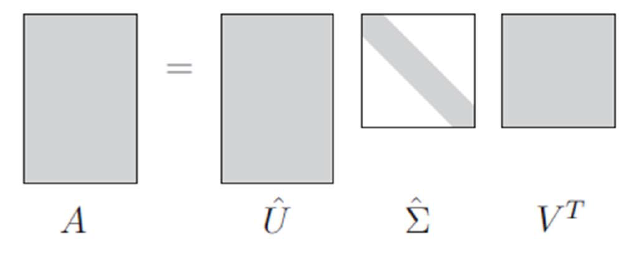</center>
<br>

<a name = "heading2-3"></a>
__Full Singular Value Decomposition__

We can add extra orthonormal columns to $U$ to make an orthogonal matrix $(m \geq n)$

<br>

$$ U = \begin{bmatrix} u_1 & u_2 & \cdots & u_m \end{bmatrix}$$

<br>

We also add extra rows of zeros to $\hat \Sigma$, so

<br>

$$ A = U\Sigma V^T$$



<br>
<center>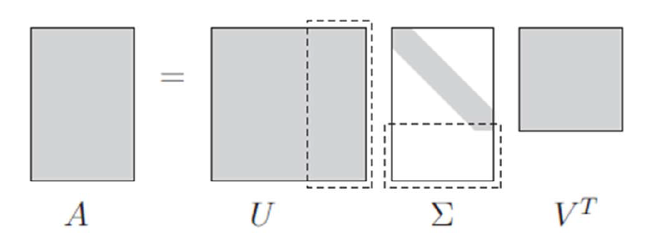</center>
<br>



This is the <font color="blue"><i>(full) singular value decomposition</i></font> of $A$

- Every matrix $A$ has a singular value decomposition.

- If $A$ is not full rank, then some of the diagonal entries of $\Sigma$ will be zero



<a name = "heading2-4"></a>
__Interpretation of SVD__



<br>
<center></center>
<br>



The SVD decomposes the linear map into

- <font color=blue><i>rotate</i></font> by $V^T$

- <font color=blue><i>diagonal scaling</i></font> by $\sigma_i$

- <font color=blue><i>rotate</i></font> by $U$

Note that, unlike the eigen-decomposition, input and output directions are different

<a name = "heading2-5"></a>
__SVD: Matrix factorization__

- for any matrix $A$

<br>

$$ A = U\Sigma V^T $$

<br>

- for symmetric and positive definite matrix $A$

<br>

$$A = S\Lambda S^{-1} = S\Lambda S^T\quad (S: \text{eigenvectors})$$


<a name = "heading2-6"></a>
- Example

<br>

$$\begin{array}{Icr} A = \begin{bmatrix} 4 & 4 \\ -3 & 3  \end{bmatrix} \end{array}
\quad \quad
\begin{array}{Icr} \begin{align*}
&\textbf{orthonormal basis} \\
&v_1, v_2 \text{ in row space } \mathbb{R}^2 \\
&u_1, u_2 \text{ in column space } \mathbb{R}^2 \\
&\sigma_1 > 0 \\
&\sigma_2 > 0
\end{align*} \end{array} $$

<br>

$$
\begin{array}{lcr} A v_1 = \sigma_1 u_1\\ A v_2 = \sigma_2 u_2 \end{array}
\; \implies \;
\begin{array}{lcr} AV = U\Sigma \\ A = U\Sigma V^{-1} = U\Sigma V^T \end{array}$$

<br>

1) $A^TA$: (small) positive definite & symmetric

<br>

$$A^TA = V\Sigma^TU^TU\Sigma V^T = V\Sigma^T\Sigma V^T = V\begin{bmatrix} \sigma_1^2&  &  \\ & \sigma_2^2 & \\ &  & \ddots \\ \end{bmatrix}V^T$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
A = np.array([[4, 4],
              [-3, 3]])

A = np.asmatrix(A)

[D, V] = np.linalg.eig(A.T*A)

print(V, '\n')
print(D)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

[32. 18.]


2) $AA^T$: (large) positive definite & symmetric

<br>

$$AA^T = U\Sigma V^TV\Sigma^TU^T = U\Sigma\Sigma^TU^T = U\begin{bmatrix} \sigma_1^2&  &  \\ & \sigma_2^2 & \\ &  & \ddots \\ \end{bmatrix}U^T$$

In [ ]:
[D, U] = np.linalg.eig(A*A.T)

print(U, '\n')
print(D)

[[1. 0.]
 [0. 1.]] 

[32. 18.]


$$ A = U\Sigma V^T $$

In [ ]:
[U, S, VT] = np.linalg.svd(A, full_matrices = True)

print(U.shape, S.shape, VT.shape, '\n')
print(U, '\n')
print(S, '\n')
print(VT)

(2, 2) (2,) (2, 2) 

[[-1.  0.]
 [ 0.  1.]] 

[5.65685425 4.24264069] 

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


<a name = "heading3"></a>
## 4.2. PCA and SVD

- Any real symmetric and positive definite matrix $B$ has a eigen decomposition

<br>

$$B = S\Lambda S^T$$

<br>

- A real matrix $(m\times n)$ $A$, where $m>n$, has the decompsition

<br>

$$A = U\Sigma V^T$$

<br>

- From $A$ (skinny and full rank) we can construct two positive-definite symmetric matrices, $AA^T$ and $A^TA$

<br>

$$\begin{align*}
AA^T &= U\Sigma V^T V \Sigma^T U^T = U \Sigma \Sigma^T U^T \quad (m \times m, \,n\, \text{eigenvalues and }\, m-n \; \text{zeros},\; U\; \text{eigenvectors})\\
A^TA &= V \Sigma^T U^T U\Sigma V^T = V \Sigma^T \Sigma V^T \quad (n \times n, \,n \;\text{eigenvalues},\; V\; \text{eigenvectors})
\end{align*}$$

<br>

- PCA by SVD

<br>

$$B = A^TA = V \Sigma^T \Sigma V^T = V \Lambda V^T$$

<br>

- $V$ is eigenvectors of $B = A^TA$
- $\sigma_i^2 = \lambda_i$
- Note that in PCA,

<br>

 $$ VS V^T \quad \left(\text{where }S = \frac{1}{m}X^TX = \left(\frac{X}{\sqrt{m}}\right)^T \frac{X}{\sqrt{m}} = A^TA \right) $$

In [ ]:
%%html
<iframe src="https://www.youtube.com/embed/Nx0lRBaXoz4?rel=0"
width="560" height="315" frameborder="0" allowfullscreen></iframe>

<a name = "heading4"></a>
## 4.3. Low Rank Approximation: Dimension Reduction



<a name = "heading4-1"></a>
### 4.3.1. Low Rank Approximation

<br>


<center></center>



<br>

- in 2D case

<br>

$$
\begin{align*}
x & = c_1 v_1 + c_2 v_2 \\
& = \langle x, v_1 \rangle v_1 + \langle x, v_2 \rangle v_2\\
& = ( v_1^{T} x) v_1 + ( v_2^T x) v_2 \\ \\
Ax & = c_1 A v_1 + c_2 A  v_2 \\
& = c_1\sigma_1  u_1 + c_2 \sigma_2  u_2 \\
& =  u_1 \sigma_1 v_1^Tx + u_2\sigma_2 v_2^T x \\ \\
& = \begin{bmatrix} u_1 & u_2 \end{bmatrix}\begin{bmatrix}\sigma_1 & 0\\ 0 & \sigma_2 \end{bmatrix}\begin{bmatrix} v_1^T \\ v_2^T \end{bmatrix} x \\ \\
& = U \Sigma V^Tx \\\\
& \approx u_1\sigma_1 v_1^Tx \quad (\text{if } \sigma_1 \gg \sigma_2)
\end{align*}$$

<br>

- Low rank approximation of matrix $A$ in general

<br>

$$\begin{align*}
A &= U_r \Sigma_r V_r^T = \sum_{i=1}^{r}\sigma_i u_i v_i^T\\ \\
\tilde A &= U_k \Sigma_k V_k^T = \sum_{i=1}^{k}\sigma_i u_i v_i^T \qquad (k \leq r)
\end{align*}$$

<a name = "heading4-2"></a>
__Example: Matrix__

In [ ]:
A = np.array([[11.08, 6.82, 1.76, -6.82],
              [2.50, -1.01, -2.60, 1.19],
              [-4.88, -5.07, -3.21, 5.20],
              [-0.49, 1.52, 2.07, -1.66],
              [-14.04, -12.40, -6.66, 12.65],
              [0.27, -8.51, -10.19, 9.15],
              [9.53, -9.84, -17.00, 11.00],
              [-12.01, 3.64, 11.10, -4.48]])

<br>
<center>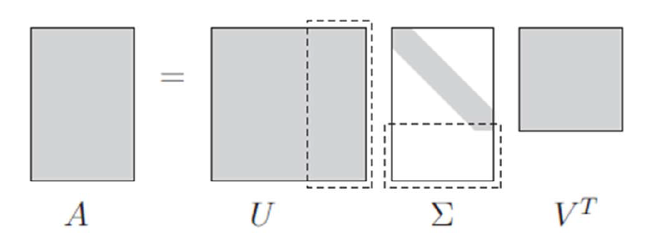</center>
<br>

In [ ]:
[U, S, VT] = np.linalg.svd(A, full_matrices = True)

U = np.asmatrix(U)
S = np.asmatrix(np.diag(S))
VT = np.asmatrix(VT)

print(U.shape, S.shape, V.shape, '\n')
print(U, '\n')
print(S, '\n')
print(VT)

(8, 8) (4, 4) (2, 2) 

[[-0.24642369  0.44536234  0.6205749   0.32739909  0.45915182  0.05410587
  -0.18650735  0.00956801]
 [ 0.07432183  0.10750102  0.28337342 -0.77803389 -0.10352762  0.32547077
  -0.42245245  0.04655432]
 [ 0.21369502 -0.1903207   0.49492174  0.11043549 -0.4736735  -0.61498898
  -0.24132713 -0.01233476]
 [-0.08223154 -0.02472167  0.20057294  0.06152361 -0.27047805  0.29819169
   0.20131309 -0.86371786]
 [ 0.50375686 -0.55378628  0.13739629 -0.02351069  0.61002316  0.01682912
  -0.07593043 -0.20479838]
 [ 0.43719294  0.03496575 -0.05496539  0.50172005 -0.29664823  0.55199001
  -0.3572128   0.18055856]
 [ 0.59019451  0.42657675  0.21078205 -0.13667122 -0.03298713 -0.00394525
   0.6243326   0.1252985 ]
 [-0.2967926  -0.51321848  0.42787997  0.0231769  -0.14042827  0.34499254
   0.40598717  0.40166774]] 

[[3.68258450e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.62368811e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.202133

<br>
<center>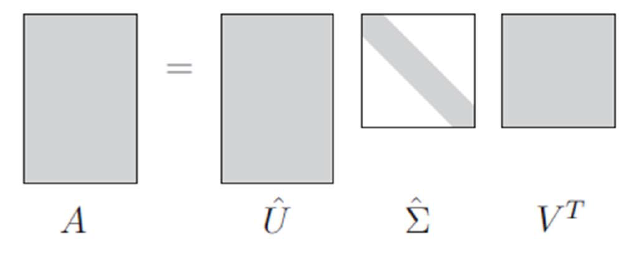</center>
<br>

In [ ]:
[U, S, VT] = np.linalg.svd(A, full_matrices = False)

U = np.asmatrix(U)
S = np.asmatrix(np.diag(S))
VT = np.asmatrix(VT)

print(U.shape, S.shape, V.shape, '\n')
print(U, '\n')
print(S, '\n')
print(VT)

(8, 4) (4, 4) (2, 2) 

[[-0.24642369  0.44536234  0.6205749   0.32739909]
 [ 0.07432183  0.10750102  0.28337342 -0.77803389]
 [ 0.21369502 -0.1903207   0.49492174  0.11043549]
 [-0.08223154 -0.02472167  0.20057294  0.06152361]
 [ 0.50375686 -0.55378628  0.13739629 -0.02351069]
 [ 0.43719294  0.03496575 -0.05496539  0.50172005]
 [ 0.59019451  0.42657675  0.21078205 -0.13667122]
 [-0.2967926  -0.51321848  0.42787997  0.0231769 ]] 

[[3.68258450e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.62368811e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.20213307e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.10429562e-03]] 

[[-0.03564832 -0.5381828  -0.61426544  0.5759917 ]
 [ 0.92076022  0.16617467 -0.32597333 -0.13538086]
 [-0.13920696 -0.49222525 -0.31155848 -0.80079151]
 [-0.36269992  0.66367127 -0.6475729  -0.09294376]]


__Question__

How to determine a good $k$ so that we can efficiently compress $A$ without losing too much information of $A$?

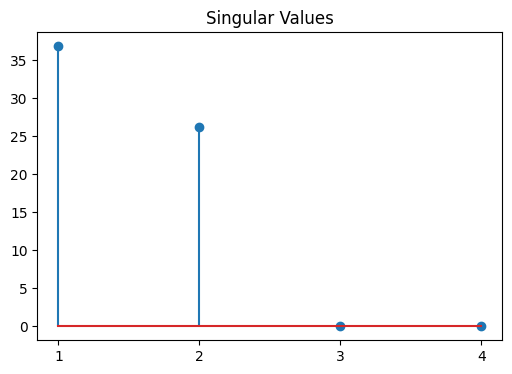

In [ ]:
sig_val = np.diag(S)

plt.figure(figsize = (6, 4))
plt.stem(range(1,5), sig_val)
plt.xticks(range(1,5))
plt.title('Singular Values')
plt.show()

In [ ]:
k = 2

low_U = U[:, :k]
low_S = S[:k, :k]
low_VT = VT[:k, :]

A_approx = low_U*low_S*low_VT

print(low_U.shape, low_S.shape, low_VT.shape, '\n')
print('A:\n', A ,'\n')
print('A_approx:\n', A_approx, '\n')
print('low_U:\n', low_U, '\n')
print('low_VT:\n', low_VT)

(8, 2) (2, 2) (2, 4) 

A:
 [[ 11.08   6.82   1.76  -6.82]
 [  2.5   -1.01  -2.6    1.19]
 [ -4.88  -5.07  -3.21   5.2 ]
 [ -0.49   1.52   2.07  -1.66]
 [-14.04 -12.4   -6.66  12.65]
 [  0.27  -8.51 -10.19   9.15]
 [  9.53  -9.84 -17.    11.  ]
 [-12.01   3.64  11.1   -4.48]] 

A_approx:
 [[ 11.08250851   6.8256176    1.76533991  -6.80890115]
 [  2.49942829  -1.00429274  -2.60062751   1.19462804]
 [ -4.87827835  -5.06500943  -3.20623934   5.20878009]
 [ -0.48927124   1.52196569   2.07157948  -1.65643381]
 [-14.03962233 -12.39843105  -6.65913505  12.65241176]
 [  0.27076035  -8.51229541 -10.18871873   9.14926874]
 [  9.53039313  -9.83725225 -16.99900559  11.0036522 ]
 [-12.00864542   3.64455947  11.10301226  -4.47244356]] 

low_U:
 [[-0.24642369  0.44536234]
 [ 0.07432183  0.10750102]
 [ 0.21369502 -0.1903207 ]
 [-0.08223154 -0.02472167]
 [ 0.50375686 -0.55378628]
 [ 0.43719294  0.03496575]
 [ 0.59019451  0.42657675]
 [-0.2967926  -0.51321848]] 

low_VT:
 [[-0.03564832 -0.5381828  -0.614



# Exercise Set on Dimensionality Reduction

## Exercise 1: Understanding Dimensionality Reduction
1. **Conceptual Questions:**
   - What is dimensionality reduction, and why is it important in data analysis?
   - Explain the difference between dimensionality reduction and feature selection.
   - How does PCA achieve dimensionality reduction? Discuss its main steps.

## Exercise 2: Implementing PCA from Scratch
2. **Coding Task:**
   - Using a synthetic dataset (e.g., ask GPT to create a synethetic dataset with correlated and uncorrelated features and use this code in your program), implement PCA from scratch. Your implementation should:
     1. Standardize the dataset.
     2. Compute the covariance matrix.
     3. Calculate the eigenvalues and eigenvectors.
     4. Sort the eigenvalues and select the top k eigenvectors.
     5. Transform the original dataset using the selected eigenvectors.
You can use sklearn routines to implement the above steps
## Exercise 3: PCA Visualization
3. **Data Visualization:**
   - Apply PCA to the Iris dataset or synthetic dataset. Visualize the data in two dimensions using the first two principal components. Comment on the structure of the data based on your plot.

#### Exercise 4: Variance Explained by PCA
4. **Variance Analysis:**
   - After implementing PCA, calculate the explained variance for each principal component. Create a scree plot to visualize the explained variance and decide how many principal components to retain based on the plot.

#### Exercise 5: Fisher Discriminant Analysis (FDA)
5. **FDA Implementation:**
   - Implement Fisher Discriminant Analysis (LDA) on a dataset with labeled classes (ask the GPT to  modify the previous synthetic code so it has labels. Your implementation should:
     1. Compute the mean of each class.
     2. Calculate the within-class and between-class scatter matrices.
     3. Solve the generalized eigenvalue problem to find the optimal projection directions.
     4. Transform the dataset and visualize the results.

#### Exercise 6: Singular Value Decomposition (SVD)
6. **SVD Application:**
   - Use SVD to perform dimensionality reduction on a dataset. Discuss how SVD relates to PCA and provide a summary of the results, including the singular values and their significance.

#### Exercise 7: Comparison of Techniques
7. **Comparative Analysis:**
   - Compare PCA, FDA, and SVD in terms of their objectives, methodologies, and applications. Discuss when you would prefer one technique over the others.

